<a href="https://colab.research.google.com/github/nebojsa55/Computational-Genomics_MidTerm-Project/blob/master/notebooks/4.%20Gene-importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description

In this notebook features will be sorted by importance based on *SelectKBest* class from *sklearn.feature_selection*. Then top 10 features will be plotted with their respective K scores.

In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Navigate to the folder cointaing our data
%cd 'drive/MyDrive/ETF/Master/Computational-Genomics/Project/data'

Mounted at /content/drive
/content/drive/MyDrive/ETF/Master/Computational-Genomics/Project/data


In [2]:
anno = pd.read_csv('anoSC1_v11_nokey.csv', delimiter = ',', index_col = 0)
HTA20_RMA = pd.read_csv('HTA20_RMA.csv', delimiter = ',', index_col = 0).transpose()

# Sync the X and y data by sorting the labels

df1 = anno.sort_index()
df2 = HTA20_RMA.sort_index()

X = df2.iloc[np.array(np.logical_not(df1['GA'].isna())),:]
y = df1.dropna().loc[:,['GA','Batch']]

# Check to see if the indexes are the same
(X.index == y.index).all()

True

In [3]:
# Drop Sample_X samples

X = X.iloc[32:,:]
y = y.iloc[32:,:]

In [4]:
from sklearn.preprocessing import StandardScaler

XX = np.zeros(X.shape)
for i in [1,2,3,4,5,6,7,8,9,10]:
    scale = StandardScaler()
    indices = np.bool8(y['Batch'] == i)
    Xtemp = X.iloc[indices,:]
    scale.fit(Xtemp)
    XX[indices,:] = scale.transform(Xtemp)

# delete batch column
yy = y['GA']

In [5]:
from sklearn.feature_selection import f_regression,SelectKBest

selector = SelectKBest(f_regression, k = 'all')
selector.fit(XX,yy)
scores = pd.DataFrame()

scores['Gene'] = X.columns
scores['Kscore'] = selector.scores_

# Sort the scores by descending orded
scores = scores.sort_values(by = 'Kscore', ascending = False)

scores

,Gene,Kscore
14087,199675_at,7.228141e+01
15451,2359_at,6.260472e+01
19256,3507_at,5.793563e+01
32431,9619_at,5.783298e+01
27388,6689_at,5.216264e+01
...,...,...
32164,9370_at,9.532947e-08
2888,100652824_at,5.852026e-08
22193,50506_at,4.329672e-08
8980,1057_at,4.068522e-08


In [6]:
# Select the first 10 genes

scores_10 = scores.iloc[0:10,:]
scores_10

,Gene,Kscore
14087,199675_at,72.281406
15451,2359_at,62.604719
19256,3507_at,57.935625
32431,9619_at,57.832976
27388,6689_at,52.162642
21692,4481_at,51.882048
18559,326624_at,51.610679
32544,973_at,50.016548
22823,5169_at,49.733886
29063,79087_at,47.355061


<Figure size 900x3000 with 0 Axes>

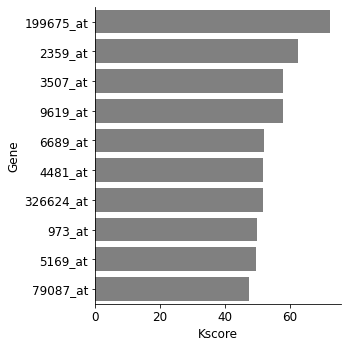

In [7]:
# Plot top 10 gene scores

import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 12})
plt.figure(figsize = (3,10), dpi = 300)
sb.catplot(x = "Kscore", 
           y = "Gene", 
           data = scores_10, 
           kind = "bar",
           orient = "h",
           color = "gray"
           ).tight_layout()

